<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Neural_Nets_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classifier Using the Keras Sequential API

Importing TensorFlow and other libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Loading the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Preprocessing

In [3]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

Splitting data into training, validation, and test sets

In [4]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Class names for Fashion MNIST

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building the Sequential Model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model summary

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

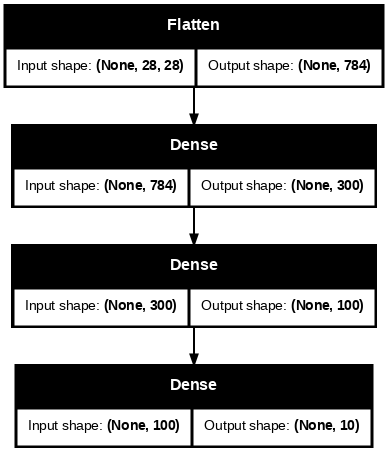

In [8]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True, dpi=72)

In [9]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name)
weights, biases = hidden1.get_weights()

Compiling the Model

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Training

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8479 - loss: 0.4348 - val_accuracy: 0.8634 - val_loss: 0.4106
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8533 - loss: 0.4140 - val_accuracy: 0.8646 - val_loss: 0.3913
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8606 - loss: 0.3887 - val_accuracy: 0.8676 - val_loss: 0.3831
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8671 - loss: 0.3762 - val_accuracy: 0.8702 - val_loss: 0.3772
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8690 - loss: 0.3681 - val_accuracy: 0.8754 - val_loss: 0.3550
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8734 - loss: 0.3566 - val_accuracy: 0.8752 - val_loss: 0.3560
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8799 - loss: 0.3400 - val_accuracy: 0.8768 - val_loss: 0.3427
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8815 - loss: 0.3

Plotting Learning Curves

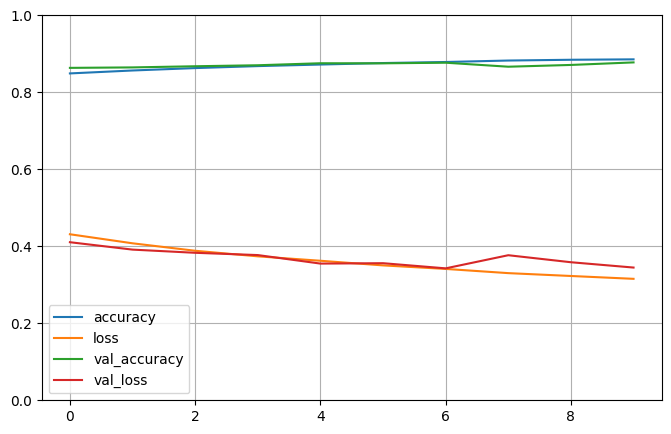

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Evaluate

In [15]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8643 - loss: 0.3800


[0.3794689178466797, 0.8632000088691711]

Making Predictions

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = np.argmax(y_proba, axis=1) # Alternative to model.predict_classes()
y_pred
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([9, 2, 1], dtype=uint8)

Complex Models Using the Keras Functional API or the Subclassing API

Functional API

In [17]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat) # Add a Flatten layer
output = keras.layers.Dense(10, activation="softmax")(flatten) # Connect to the flattened output
model_functional = keras.models.Model(inputs=[input_], outputs=[output])

In [18]:
model_functional.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 28, 300)   │      8,700 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 28, 100)   │     30,100 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 128)   │          0 │ input_layer_1[0]… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3584)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 10)        │     35,850 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,650 (291.60 KB)

 Trainable params: 74,650 (291.60 KB)

 Non-trainable params: 0 (0.00 B)

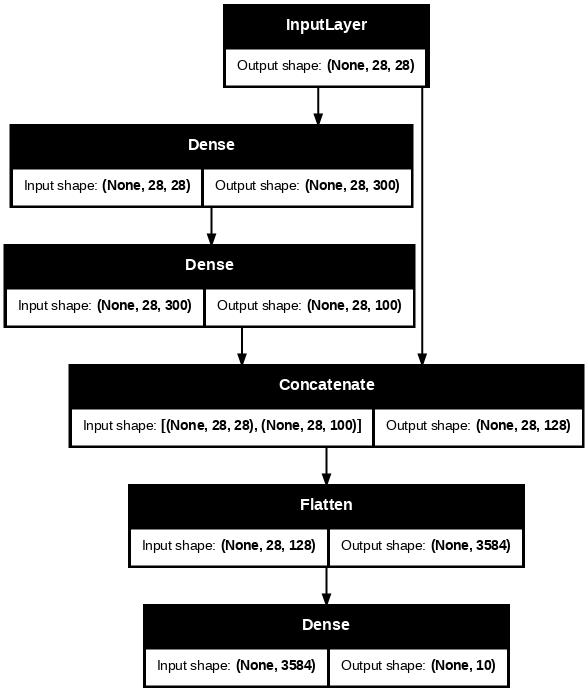

In [19]:
keras.utils.plot_model(model_functional, "my_complex_model.png", show_shapes=True, dpi=72)

In [20]:
model_functional.compile(loss="sparse_categorical_crossentropy",
                         optimizer="sgd",
                         metrics=["accuracy"])

history_functional = model_functional.fit(X_train, y_train, epochs=10,
                                          validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6915 - loss: 0.9991 - val_accuracy: 0.8232 - val_loss: 0.5345
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8166 - loss: 0.5303 - val_accuracy: 0.8438 - val_loss: 0.4703
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8353 - loss: 0.4782 - val_accuracy: 0.8496 - val_loss: 0.4405
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8421 - loss: 0.4524 - val_accuracy: 0.8604 - val_loss: 0.4259
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8513 - loss: 0.4278 - val_accuracy: 0.8618 - val_loss: 0.4182
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8560 - loss: 0.4114 - val_accuracy: 0.8606 - val_loss: 0.4014
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8590 - loss: 0.4060 - val_accuracy: 0.8676 - val_loss: 0.3904
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8657 - loss: 0.38

Model with multiple inputs

In [21]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model_multi_input = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model_multi_input.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Model with multiple outputs

In [22]:
input_A = keras.layers.Input(shape=[6], name="input_A")
input_B = keras.layers.Input(shape=[8], name="input_B")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output_main = keras.layers.Dense(1, name="main_output")(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)

model_multi_output = keras.models.Model(inputs=[input_A, input_B],
                                         outputs=[output_main, output_aux])

model_multi_output.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Subclassing API

In [23]:
class MySequentialModel(keras.models.Sequential):
    def call(self, inputs):
        return super().call(inputs)

class MyModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.dense1 = keras.layers.Dense(units, activation=activation)
        self.dense2 = keras.layers.Dense(units, activation=activation)
        self.dense3 = keras.layers.Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

Saving and Restoring Models

In [24]:
model.save("my_keras_model.h5")
model_loaded = keras.models.load_model("my_keras_model.h5")

Using Callbacks During Training

Model Checkpointing and Early Stopping

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_callbacks = model.fit(X_train, y_train, epochs=50,
                              validation_data=(X_valid, y_valid),
                              callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8896 - loss: 0.3053

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8896 - loss: 0.3053 - val_accuracy: 0.8672 - val_loss: 0.3646
Epoch 2/50
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.3008

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8925 - loss: 0.3008 - val_accuracy: 0.8852 - val_loss: 0.3226
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8934 - loss: 0.2951 - val_accuracy: 0.8866 - val_loss: 0.3236
Epoch 4/50
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2868

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8956 - loss: 0.2868 - val_accuracy: 0.8876 - val_loss: 0.3206
Epoch 5/50
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8999 - loss: 0.2779

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8999 - loss: 0.2780 - val_accuracy: 0.8886 - val_loss: 0.3137
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9012 - loss: 0.2720 - val_accuracy: 0.8880 - val_loss: 0.3186
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.2735

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9020 - loss: 0.2735 - val_accuracy: 0.8890 - val_loss: 0.3085
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9010 - loss: 0.2710 - val_accuracy: 0.8906 - val_loss: 0.3143
Epoch 9/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9033 - loss: 0.2635 - val_accuracy: 0.8780 - val_loss: 0.3237
Epoch 10/50
1705/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9087 - loss: 0.2554

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9087 - loss: 0.2554 - val_accuracy: 0.8888 - val_loss: 0.3084
Epoch 11/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9093 - loss: 0.2526 - val_accuracy: 0.8876 - val_loss: 0.3152
Epoch 12/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9093 - loss: 0.2508 - val_accuracy: 0.8874 - val_loss: 0.3113
Epoch 13/50
1706/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9115 - loss: 0.2452

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9115 - loss: 0.2452 - val_accuracy: 0.8920 - val_loss: 0.3022
Epoch 14/50
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.2371

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9124 - loss: 0.2372 - val_accuracy: 0.8936 - val_loss: 0.2995
Epoch 15/50
1709/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9144 - loss: 0.2373

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9144 - loss: 0.2373 - val_accuracy: 0.8952 - val_loss: 0.2943
Epoch 16/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9179 - loss: 0.2270 - val_accuracy: 0.8878 - val_loss: 0.3007
Epoch 17/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9168 - loss: 0.2257 - val_accuracy: 0.8860 - val_loss: 0.3110
Epoch 18/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9176 - loss: 0.2280 - val_accuracy: 0.8860 - val_loss: 0.3173
Epoch 19/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9198 - loss: 0.2201 - val_accuracy: 0.8864 - val_loss: 0.3076
Epoch 20/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9229 - loss: 0.2154 - val_accuracy: 0.8930 - val_loss: 0.3037
Epoch 21/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9221 - loss: 0.2133 - val_accuracy: 0.8934 - val_loss: 0.3010
Epoch 22/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9243 - loss: 0.2073 - val

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9302 - loss: 0.1977 - val_accuracy: 0.8916 - val_loss: 0.2930
Epoch 26/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9293 - loss: 0.1990 - val_accuracy: 0.8924 - val_loss: 0.3003
Epoch 27/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9313 - loss: 0.1905 - val_accuracy: 0.8952 - val_loss: 0.2955
Epoch 28/50
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9318 - loss: 0.1911

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9318 - loss: 0.1911 - val_accuracy: 0.8940 - val_loss: 0.2927
Epoch 29/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9323 - loss: 0.1887 - val_accuracy: 0.8890 - val_loss: 0.3077
Epoch 30/50
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9348 - loss: 0.1810

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9348 - loss: 0.1810 - val_accuracy: 0.9016 - val_loss: 0.2880
Epoch 31/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9391 - loss: 0.1737 - val_accuracy: 0.8954 - val_loss: 0.2909
Epoch 32/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9359 - loss: 0.1776 - val_accuracy: 0.8896 - val_loss: 0.3148
Epoch 33/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9372 - loss: 0.1747 - val_accuracy: 0.8970 - val_loss: 0.2924
Epoch 34/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9415 - loss: 0.1660 - val_accuracy: 0.8956 - val_loss: 0.2987
Epoch 35/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9377 - loss: 0.1713 - val_accuracy: 0.8904 - val_loss: 0.3139
Epoch 36/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9387 - loss: 0.1681 - val_accuracy: 0.8950 - val_loss: 0.2930
Epoch 37/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9420 - loss: 0.1632 - v

TensorBoard

In [26]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [27]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history_tensorboard = model.fit(X_train, y_train, epochs=10,
                                validation_data=(X_valid, y_valid),
                                callbacks=[tensorboard_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9351 - loss: 0.1817 - val_accuracy: 0.8944 - val_loss: 0.2924
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9360 - loss: 0.1775 - val_accuracy: 0.8906 - val_loss: 0.2990
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9366 - loss: 0.1763 - val_accuracy: 0.8936 - val_loss: 0.3055
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9376 - loss: 0.1749 - val_accuracy: 0.8978 - val_loss: 0.2936
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9409 - loss: 0.1654 - val_accuracy: 0.8960 - val_loss: 0.3011
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9395 - loss: 0.1653 - val_accuracy: 0.8962 - val_loss: 0.2984
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9410 - loss: 0.1635 - val_accuracy: 0.8942 - val_loss: 0.3091
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9426 - loss: 0.1625

Fine-Tuning Neural Network Hyperparameters

Using GridSearchCV with Keras models

In [29]:
!pip install scikeras

In [30]:
from scikeras.wrappers import KerasClassifier

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

keras_clf = KerasClassifier(model=build_model,verbose=1)